In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


When we look at the data, we realize that the target columns are actually stored in a separate file. To fix this, we can just merge the two since they share ids into one dataframe. We will combine functional with functional needs to repairs so this will be a binary problem as opposed to a ternary one.

In [3]:
df_labels = pd.read_csv('../data/training_set_labels.csv', header=0)
df_labels.replace({'functional needs repair': 'functional'}, inplace=True)
df_labels['status_group'].value_counts(normalize=True)

functional        0.615758
non functional    0.384242
Name: status_group, dtype: float64

In [4]:
df_values = pd.read_csv('../data/training_set_values.csv', header=0)
df_values

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,...,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump


Since the data is stored in two separate csv, we will combine them into one. Then we'll combine the target columns with the dataframes.

In [5]:
df_val_test = pd.read_csv('../data/test_set.csv', header=0)
df_val_test
df_values = pd.concat([df_values, df_val_test], ignore_index=True)

df_values = df_values.merge(df_labels, left_on='id', right_on='id')

In [6]:
df_values

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,...,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional


There are a lot of columns with non numerical entries. This means we might have to one hot encode them, however with how many columns and distinct entries there are, it might be too many factors. We will likely need to drop some of these columns. First lets plot of graphs with only the numeric columns

We also should take a sample of the data for this graphing since there is a lot of data and it would take a long time to graph each time.

In [7]:
df_numeric = df_values.select_dtypes(include=np.number).merge(df_labels, left_on='id', right_on='id')
#Take a sample of a quarter of the data, random state for reproducability
df_num_sample = df_numeric.sample(frac=0.10, random_state= 5)
df_num_sample.drop(columns=['id'], inplace=True)

# TEMPORARILY COMMENTED OUT SO PROGRAM DOES NOT STALL EACH TIME 
# sns.pairplot(hue = 'status_group', data= df_num_sample)

# Baseline Model
With just the numerical categories, there does not seem to be any columns that do a particularly good job at correlating to a well being either function or non functional. \
What we'll do for now is just to create a baseline model without any preprocessing to see what the accuracy score will be.

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import accuracy_score
#Drop the id column now that we don't need it
df_values.drop(columns=['id'], inplace=True)
#Assign status_group to numbers
df_values['status_group'].replace({'functional': 1, 'non functional': 0}, inplace=True)

X = df_numeric.drop(columns=['status_group'])
y = df_values['status_group']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

model = LogisticRegression(max_iter=10000, solver='liblinear')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.6174410774410775

Without any preproccessing done, the model does a pretty bad job at predicting the results, with a large amount of false positives and a not so small false negative as well.

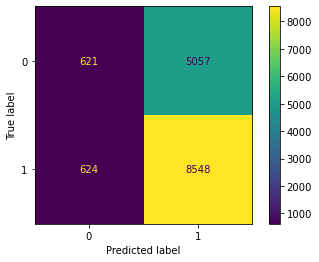

In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

Next, we'll try to look at the coeeficients to see which columns have a high correlation.

In [22]:
coefficients = model.coef_[0]
odds_ratios = np.exp(coefficients)

feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficients': coefficients, 'Odds Ratios': odds_ratios})
feature_importance

,Feature,Coefficients,Odds Ratios
0,amount_tsh,0.000049,1.000049
1,gps_height,0.000412,1.000412
2,longitude,-0.023032,0.977231
3,latitude,-0.000332,0.999668
4,num_private,0.000013,1.000013
...,...,...,...
61,payment_type_never pay,-0.925730,0.396242
62,payment_type_on failure,-0.265336,0.766948
63,payment_type_other,-0.447805,0.639029
64,payment_type_per bucket,0.187948,1.206771


Here we can see that most of the numerical data has a negative coefficient, aside from longitude, num private, region code, and construction year, most of which have a near 0 coefficient.   
We'll also look at the categorical columns and see if we can drop any that are not particularly useful.  

In [96]:
#A fair amount of these columns are essentially duplicates, have the same data as other columns or similar
non_important_columns = ['wpt_name', 'region_code', 'district_code', 'subvillage', 'extraction_type', 'extraction_type_group', 'payment', 'water_quality', 'quantity', 'waterpoint_type', 'management', 'source', 'source_type', 'scheme_name', 'lga', 'ward']
prep_df_values = df_values.drop(columns=non_important_columns)
prep_df_values

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,num_private,basin,region,...,permit,construction_year,extraction_type_class,management_group,payment_type,quality_group,quantity_group,source_class,waterpoint_type_group,status_group
0,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,0,Lake Nyasa,Iringa,...,False,1999,gravity,user-group,annually,good,enough,groundwater,communal standpipe,1
1,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,0,Lake Victoria,Mara,...,True,2010,gravity,user-group,never pay,good,insufficient,surface,communal standpipe,1
2,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,0,Pangani,Manyara,...,True,2009,gravity,user-group,per bucket,good,enough,surface,communal standpipe,1
3,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,0,Ruvuma / Southern Coast,Mtwara,...,True,1986,submersible,user-group,never pay,good,dry,groundwater,communal standpipe,0
4,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,0,Lake Victoria,Kagera,...,True,0,gravity,other,never pay,good,seasonal,surface,communal standpipe,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,0,Pangani,Kilimanjaro,...,True,1999,gravity,user-group,per bucket,good,enough,groundwater,communal standpipe,1
59396,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,0,Rufiji,Iringa,...,True,1996,gravity,user-group,annually,good,enough,surface,communal standpipe,1
59397,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,0,Rufiji,Mbeya,...,False,0,handpump,user-group,monthly,fluoride,enough,groundwater,hand pump,1
59398,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,0,Rufiji,Dodoma,...,True,0,handpump,user-group,never pay,good,insufficient,groundwater,hand pump,1


We can also combine date_recorded with construction year by subtracting the two and storing them as a year

In [97]:
from sklearn.preprocessing import OneHotEncoder
from datetime import datetime
prep_df_values['date_recorded'] = prep_df_values['date_recorded'].apply(lambda row :row[:4])
prep_df_values['years_active'] = prep_df_values['date_recorded'].astype(int) - prep_df_values['construction_year'].astype(int)

#Convert years with 0 as construction year to simply 0
prep_df_values['years_active'] = prep_df_values['years_active'].apply(lambda year: year if year < 100 else np.nan)
#TEMP TRYING
prep_df_values[['amount_tsh', 'gps_height', 'longitude', 'latitude', 'population']] = prep_df_values[['amount_tsh', 'gps_height', 'longitude', 'latitude', 'population']].replace(0, np.nan)
#Now drop the two other columns
prep_df_values.drop(columns=['date_recorded', 'construction_year'], inplace=True)

prep_df_values

,amount_tsh,funder,gps_height,installer,longitude,latitude,num_private,basin,region,population,...,permit,extraction_type_class,management_group,payment_type,quality_group,quantity_group,source_class,waterpoint_type_group,status_group,years_active
0,6000.0,Roman,1390.0,Roman,34.938093,-9.856322,0,Lake Nyasa,Iringa,109.0,...,False,gravity,user-group,annually,good,enough,groundwater,communal standpipe,1,12.0
1,NaN,Grumeti,1399.0,GRUMETI,34.698766,-2.147466,0,Lake Victoria,Mara,280.0,...,True,gravity,user-group,never pay,good,insufficient,surface,communal standpipe,1,3.0
2,25.0,Lottery Club,686.0,World vision,37.460664,-3.821329,0,Pangani,Manyara,250.0,...,True,gravity,user-group,per bucket,good,enough,surface,communal standpipe,1,4.0
3,NaN,Unicef,263.0,UNICEF,38.486161,-11.155298,0,Ruvuma / Southern Coast,Mtwara,58.0,...,True,submersible,user-group,never pay,good,dry,groundwater,communal standpipe,0,27.0
4,NaN,Action In A,NaN,Artisan,31.130847,-1.825359,0,Lake Victoria,Kagera,NaN,...,True,gravity,other,never pay,good,seasonal,surface,communal standpipe,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,10.0,Germany Republi,1210.0,CES,37.169807,-3.253847,0,Pangani,Kilimanjaro,125.0,...,True,gravity,user-group,per bucket,good,enough,groundwater,communal standpipe,1,14.0
59396,4700.0,Cefa-njombe,1212.0,Cefa,35.249991,-9.070629,0,Rufiji,Iringa,56.0,...,True,gravity,user-group,annually,good,enough,surface,communal standpipe,1,15.0
59397,NaN,NaN,NaN,NaN,34.017087,-8.750434,0,Rufiji,Mbeya,NaN,...,False,handpump,user-group,monthly,fluoride,enough,groundwater,hand pump,1,NaN
59398,NaN,Malec,NaN,Musa,35.861315,-6.378573,0,Rufiji,Dodoma,NaN,...,True,handpump,user-group,never pay,good,insufficient,groundwater,hand pump,1,NaN


Here we will create a dataframe for specifically the categorical columns

In [98]:
df_categoricals = prep_df_values.select_dtypes(exclude=np.number)
df_categoricals

,funder,installer,basin,region,public_meeting,recorded_by,scheme_management,permit,extraction_type_class,management_group,payment_type,quality_group,quantity_group,source_class,waterpoint_type_group
0,Roman,Roman,Lake Nyasa,Iringa,True,GeoData Consultants Ltd,VWC,False,gravity,user-group,annually,good,enough,groundwater,communal standpipe
1,Grumeti,GRUMETI,Lake Victoria,Mara,NaN,GeoData Consultants Ltd,Other,True,gravity,user-group,never pay,good,insufficient,surface,communal standpipe
2,Lottery Club,World vision,Pangani,Manyara,True,GeoData Consultants Ltd,VWC,True,gravity,user-group,per bucket,good,enough,surface,communal standpipe
3,Unicef,UNICEF,Ruvuma / Southern Coast,Mtwara,True,GeoData Consultants Ltd,VWC,True,submersible,user-group,never pay,good,dry,groundwater,communal standpipe
4,Action In A,Artisan,Lake Victoria,Kagera,True,GeoData Consultants Ltd,NaN,True,gravity,other,never pay,good,seasonal,surface,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,Germany Republi,CES,Pangani,Kilimanjaro,True,GeoData Consultants Ltd,Water Board,True,gravity,user-group,per bucket,good,enough,groundwater,communal standpipe
59396,Cefa-njombe,Cefa,Rufiji,Iringa,True,GeoData Consultants Ltd,VWC,True,gravity,user-group,annually,good,enough,surface,communal standpipe
59397,NaN,NaN,Rufiji,Mbeya,True,GeoData Consultants Ltd,VWC,False,handpump,user-group,monthly,fluoride,enough,groundwater,hand pump
59398,Malec,Musa,Rufiji,Dodoma,True,GeoData Consultants Ltd,VWC,True,handpump,user-group,never pay,good,insufficient,groundwater,hand pump


# Building up Logistic Regression Model
Now is the time to one hot encode the categorical columns to see if there is a correlation. For any columns that end up being encoded into hundreds or even thousands of columns, they aren't worth considering.

In [106]:
X = df_categoricals[['waterpoint_type_group']]
X = pd.get_dummies(X, columns=['waterpoint_type_group'], drop_first=True, dtype=int)
X

,waterpoint_type_group_communal standpipe,waterpoint_type_group_dam,waterpoint_type_group_hand pump,waterpoint_type_group_improved spring,waterpoint_type_group_other
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0
...,...,...,...,...,...
59395,1,0,0,0,0
59396,1,0,0,0,0
59397,0,0,1,0,0
59398,0,0,1,0,0


In [107]:
y = prep_df_values['status_group']
X = prep_df_values[['amount_tsh', 'gps_height', 'longitude', 'latitude', 'num_private', 'population', 'years_active', 
                     'basin', 'region', 'extraction_type_class', 'management_group', 'quality_group', 'permit',
                     'waterpoint_type_group', 'quantity_group', 'payment_type']]
#X = pd.get_dummies(X, columns=['basin', 'region', 'extraction_type_class', 'management_group', 'quality_group', 'permit', 'waterpoint_type_group', 'quantity_group', 'payment_type'], drop_first=True, dtype=int)
X

,amount_tsh,gps_height,longitude,latitude,num_private,population,years_active,basin,region,extraction_type_class,management_group,quality_group,permit,waterpoint_type_group,quantity_group,payment_type
0,6000.0,1390.0,34.938093,-9.856322,0,109.0,12.0,Lake Nyasa,Iringa,gravity,user-group,good,False,communal standpipe,enough,annually
1,NaN,1399.0,34.698766,-2.147466,0,280.0,3.0,Lake Victoria,Mara,gravity,user-group,good,True,communal standpipe,insufficient,never pay
2,25.0,686.0,37.460664,-3.821329,0,250.0,4.0,Pangani,Manyara,gravity,user-group,good,True,communal standpipe,enough,per bucket
3,NaN,263.0,38.486161,-11.155298,0,58.0,27.0,Ruvuma / Southern Coast,Mtwara,submersible,user-group,good,True,communal standpipe,dry,never pay
4,NaN,NaN,31.130847,-1.825359,0,NaN,NaN,Lake Victoria,Kagera,gravity,other,good,True,communal standpipe,seasonal,never pay
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,10.0,1210.0,37.169807,-3.253847,0,125.0,14.0,Pangani,Kilimanjaro,gravity,user-group,good,True,communal standpipe,enough,per bucket
59396,4700.0,1212.0,35.249991,-9.070629,0,56.0,15.0,Rufiji,Iringa,gravity,user-group,good,True,communal standpipe,enough,annually
59397,NaN,NaN,34.017087,-8.750434,0,NaN,NaN,Rufiji,Mbeya,handpump,user-group,fluoride,False,hand pump,enough,monthly
59398,NaN,NaN,35.861315,-6.378573,0,NaN,NaN,Rufiji,Dodoma,handpump,user-group,good,True,hand pump,insufficient,never pay


Here we see that with the new relevant numerical columns and the one hot encoded columns that are worth exploring, we actually increased our accuracy metric to 78 from around 65.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

num_imp = SimpleImputer(strategy='median')
cat_imp = SimpleImputer(strategy='most_frequent')
#Impute numeric and categorical columns for train and test set
X_train_num = X_train[['amount_tsh', 'gps_height', 'longitude', 'latitude', 'num_private', 'population' ,'years_active']]
X_train_cat = X_train[['basin', 'region' ,'extraction_type_class', 'management_group', 'quality_group', 'permit', 'waterpoint_type_group', 'quantity_group' ,'payment_type']]
X_test_num = X_test[['amount_tsh', 'gps_height', 'longitude', 'latitude', 'num_private', 'population' ,'years_active']]
X_test_cat = X_test[['basin', 'region' ,'extraction_type_class', 'management_group', 'quality_group', 'permit', 'waterpoint_type_group', 'quantity_group' ,'payment_type']]

#Fit transform for train, transform test
num_arr = num_imp.fit_transform(X_train_num)
cat_arr = cat_imp.fit_transform(X_train_cat)
num_t_arr = num_imp.transform(X_test_num)
cat_t_arr = cat_imp.transform(X_test_cat)

#One Hot Encode Train
X_train_imp = pd.concat([pd.DataFrame(num_arr, columns=X_train_num.columns, index= X_train_num.index), pd.DataFrame(cat_arr, columns=X_train_cat.columns, index=X_train_cat.index)], axis=1)
X_train_imp = pd.get_dummies(X_train_imp, columns=['basin', 'region', 'extraction_type_class', 'management_group', 'quality_group', 'permit', 'waterpoint_type_group', 'quantity_group', 'payment_type'], drop_first=True, dtype=int)
#Test
X_test_imp = pd.concat([pd.DataFrame(num_t_arr, columns=X_test_num.columns, index= X_test_num.index), pd.DataFrame(cat_t_arr, columns=X_test_cat.columns, index=X_test_cat.index)], axis=1)
X_test_imp = pd.get_dummies(X_test_imp, columns=['basin', 'region', 'extraction_type_class', 'management_group', 'quality_group', 'permit', 'waterpoint_type_group', 'quantity_group', 'payment_type'], drop_first=True, dtype=int)

model = LogisticRegression(solver='liblinear', max_iter=10000)
model.fit(X_train_imp, y_train)

y_train_pred = model.predict(X_train_imp)
y_pred = model.predict(X_test_imp)
print(f"Train Acc: {accuracy_score(y_train, y_train_pred)}\nTest Acc: {accuracy_score(y_test, y_pred)}")

Train Acc: 0.7857014590347924
Test Acc: 0.7828282828282829


We can see that we have increased the number of true negatives, but we still have a large amount of the false metrics. In fact, we got a little more false negatives.

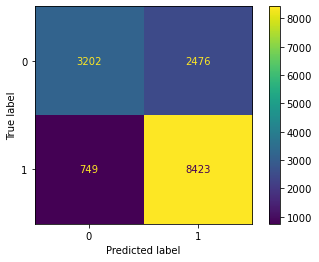

In [109]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

# Hyperparameter Tuning
Now that our accuracy is a good bit higher than where we started, we can begin tuning the hyperparameters to see if we can get a better accuracy

Done with C = 0.0001
Done with C = 0.001
Done with C = 0.01
Done with C = 0.1
Done with C = 1
Done with C = 10
Done with C = 100
Done with C = 1000.0


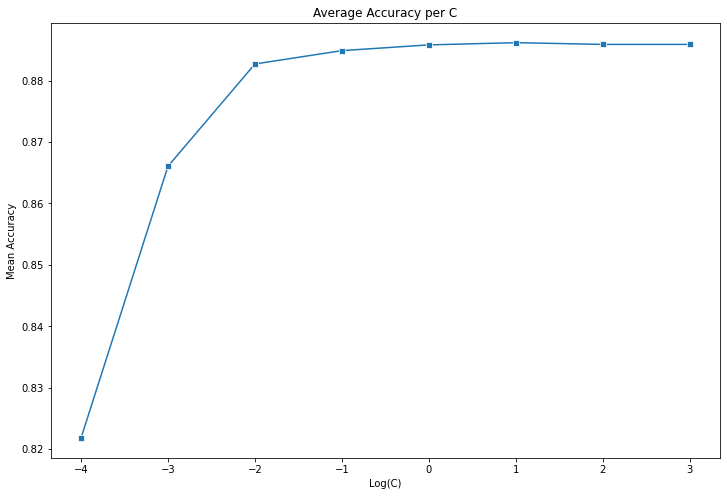

In [111]:
import matplotlib.pyplot as plt
%matplotlib inline
C_list = [1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100, 1e3]
cv_scores = []
#cv_scores_std = []

for c in C_list:
    logreg = LogisticRegression(C = c, solver='liblinear', max_iter=10000)
    cv_loop_results = cross_validate(X = X_train_imp,y = y_train, estimator=logreg, cv=10)
    cv_scores.append(np.mean(np.sqrt(np.abs(cv_loop_results['test_score']))))
    #cv_scores_std.append(np.std(np.sqrt(np.abs(cv_loop_results['test_score']))))
    print(f"Done with C = {c}")

fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x = np.log10(C_list), y = cv_scores, marker = 's')
ax.set_xlabel('Log(C)')
ax.set_ylabel('Mean Accuracy')
ax.set_title('Average Accuracy per C');


In [113]:
print(cv_scores)
index = cv_scores.index(max(cv_scores))
print(f"A C of {C_list[index]} is the best performing c with a score of: {cv_scores[index]}")

[0.8217803018238709, 0.8660639122467609, 0.8827346080712799, 0.8849090435294334, 0.8858461001239146, 0.8862029206041637, 0.8859231632378611, 0.8859236656867994]
A C of 10 is the best performing c with a score of: 0.8862029206041637


With the cross validation testing finding that a c of 1000 performs the best, we can put this back into our model and see if this reflects. \  
Interestingly, a C of 10 actually doesn't perform as well as the default value of 1. In fact, 3 is the tiniest bit better than 1

In [134]:
h_model = LogisticRegression(solver='liblinear', C=3, max_iter=10000)
h_model.fit(X_train_imp, y_train)

y_htrain_pred = h_model.predict(X_train_imp)
y_hpred = h_model.predict(X_test_imp)
print(f"Train Acc: {accuracy_score(y_train, y_htrain_pred)}\nTest Acc: {accuracy_score(y_test, y_hpred)}")

Train Acc: 0.7864870931537599
Test Acc: 0.7828956228956229


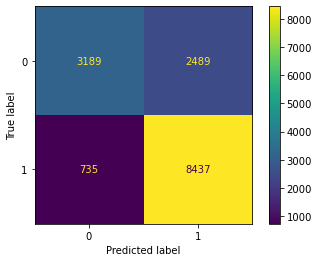

In [135]:
cm = confusion_matrix(y_test, y_hpred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()